# Epilectic Seizure Detection using CNN

In [107]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import pandas as pd
from sklearn import metrics as mt



import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Epileptic Seizure Recognition.csv')
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [3]:
data.groupby(['y']).count()['X1']

y
1    2300
2    2300
3    2300
4    2300
5    2300
Name: X1, dtype: int64

In [4]:
sub1 = data.iloc[0,1:179]

sub2 = data.iloc[1,1:179]

sub3 = data.iloc[2,1:179]

sub4 = data.iloc[8,1:179]

In [5]:
x = data.iloc[:,1:179]
y = data.iloc[:,179]

Text(0,0.5,'EEG Reading')

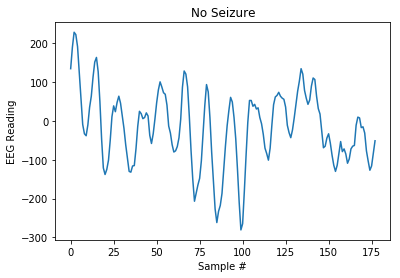

In [6]:
x = range(len(sub1))

plt.plot(x,sub1)
plt.title('No Seizure')
plt.xlabel('Sample #')
plt.ylabel('EEG Reading')
#no seizure

Text(0,0.5,'EEG Reading')

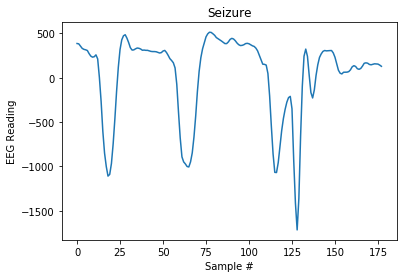

In [7]:
x = range(len(sub2))

plt.plot(x,sub2)
plt.title('Seizure')
plt.xlabel('Sample #')
plt.ylabel('EEG Reading')

#seizure

Text(0,0.5,'EEG Reading')

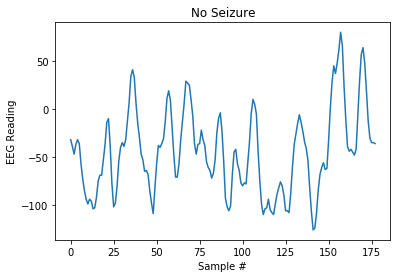

In [8]:
x = range(len(sub3))

plt.plot(x,sub3)

#no seizure
plt.title('No Seizure')
plt.xlabel('Sample #')
plt.ylabel('EEG Reading')

Text(0,0.5,'EEG Reading')

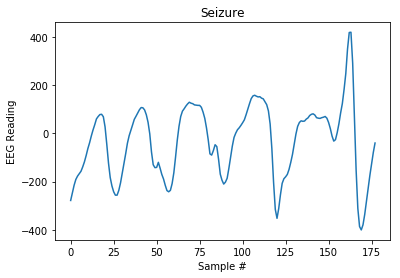

In [9]:
x = range(len(sub4))

plt.plot(x,sub4)

plt.title('Seizure')
plt.xlabel('Sample #')
plt.ylabel('EEG Reading')

(-89.0, 89.0)

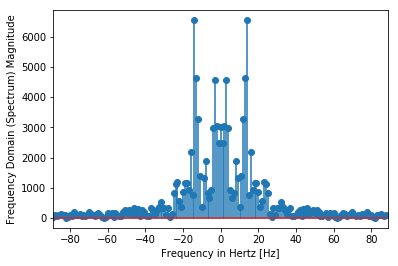

In [10]:
from scipy import fftpack

f_s = 178

X = fftpack.fft(sub1)
freqs = fftpack.fftfreq(len(sub1)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [11]:
np.average(freqs[2:40],weights=np.abs(X)[2:40])

12.954622718013187

In [12]:
np.argmax((X)[:89])

13

(-89.0, 89.0)

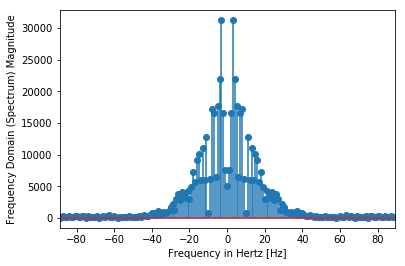

In [13]:
f_s = 178

X = fftpack.fft(sub2)
freqs = fftpack.fftfreq(len(sub2)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [14]:
np.average(freqs[2:40],weights=np.abs(X)[2:40])

11.212495723462643

In [15]:
np.argmax((X)[2:89])

2

(-89.0, 89.0)

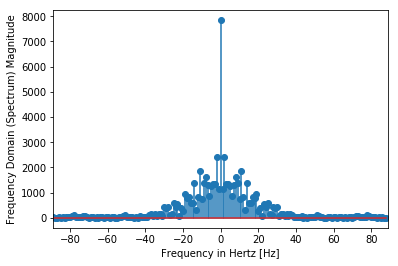

In [16]:
f_s = 178

X = fftpack.fft(sub3)
freqs = fftpack.fftfreq(len(sub3)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [17]:
np.average(freqs[2:40],weights=np.abs(X)[2:40])

12.627258598309917

In [18]:
np.argmax((X)[2:89])

6

(-89.0, 89.0)

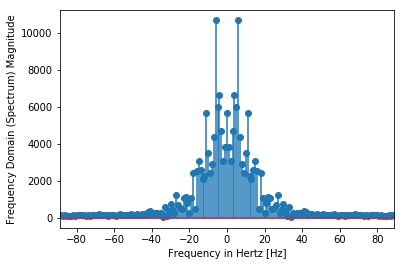

In [19]:
f_s = 178

X = fftpack.fft(sub4)
freqs = fftpack.fftfreq(len(sub4)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [20]:
freqs[:89]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88.])

In [21]:
np.abs(X)[:89]

array([ 5640.        ,  3802.53274568,  3056.457834  ,  4688.51295844,
        6615.36597429,  5975.18921974, 10671.44401319,  4354.90793381,
        2935.06532098,  2426.70038989,  3513.74831991,  5660.42364118,
        2280.30795666,  2076.86306673,  2586.89997457,  3074.70470387,
        2540.81473446,   456.76265683,  2421.94642307,  1066.98238744,
         290.64786508,   798.98406457,  1109.49194574,  1068.67499248,
         469.27863924,   539.15887073,   704.60986377,  1238.17207461,
         274.60675486,   473.51734166,   754.67222822,   399.46437869,
          96.02031869,   576.85817782,    25.03379478,   287.9349318 ,
         164.65220089,   239.22236299,   243.46634937,   266.2234538 ,
         221.62336636,   349.7524283 ,   306.6877756 ,   172.59940896,
         204.32792366,   219.86106318,   171.15635358,   149.88770163,
         206.06489459,   160.49829284,   174.90396839,   231.71305603,
         140.12990982,   158.31877688,   170.20574355,   172.2482553 ,
      

In [22]:
np.average(freqs[2:40],weights=np.abs(X)[2:40])

10.92206147216407

In [23]:
np.argmax((X)[2:40])

9

### Build First CNN for Seizure Detection using EEG data

In [24]:
from keras.layers import GlobalMaxPool1D,MaxPool1D,Convolution1D,SpatialDropout1D
from keras.layers import Dropout, Flatten, Dense, TimeDistributed
from keras.models import Sequential
from keras import models
from keras import Input, activations, optimizers, losses

In [25]:

def get_base_model():
    inp = Input(shape=(WINDOW_SIZE, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = SpatialDropout1D(rate=0.01)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = SpatialDropout1D(rate=0.01)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = SpatialDropout1D(rate=0.01)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.01)(img_1)

    dense_1 = Dropout(0.01)(Dense(64, activation=activations.relu, name="dense_1")(img_1))

    base_model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    base_model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    #model.summary()
    return base_model

In [26]:
from keras import metrics
from sklearn.metrics import accuracy_score

In [27]:
losses.sparse_categorical_crossentropy

<function keras.losses.sparse_categorical_crossentropy(y_true, y_pred)>

In [28]:
import keras.backend as K

def get_model_cnn():
    nclass = 2

    seq_input = Input(shape=(None, WINDOW_SIZE,1))#Input(shape=(None, WINDOW_SIZE, 1))
    base_model = get_base_model()
    # for layer in base_model.layers:
    #     layer.trainable = False
    encoded_sequence = TimeDistributed(base_model)(seq_input)
    encoded_sequence = SpatialDropout1D(rate=0.01)(Convolution1D(128,
                                                               kernel_size=3,
                                                               activation="relu",
                                                               padding="same")(encoded_sequence))
    encoded_sequence = Dropout(rate=0.05)(Convolution1D(128,
                                                               kernel_size=3,
                                                               activation="relu",
                                                               padding="same")(encoded_sequence))

    #out = TimeDistributed(Dense(nclass, activation="softmax"))(encoded_sequence)
    out = Convolution1D(nclass, kernel_size=3, activation="softmax", padding="same")(encoded_sequence)

    model = models.Model(seq_input, out)
    
    def custom_loss_function(y_true,y_pred):
        #predicted = np.argmax(y_pred)
        #print(y_true)
        #print(y_pred)
        pred = K.slice(y_pred,[0,0,1],[-1,-1,1])
        return losses.binary_crossentropy(y_true,pred)
    
    def accuracy_mod_func(y_true,y_pred):
        #predicted = np.argmax(y_pred)
        #print(y_true)
        #print(y_pred)
        return K.mean(K.equal(y_true,K.round(K.slice(y_pred,[0,0,1],[-1,-1,1])))) #K.mean(K.equal(K.cast(y_true,"int64"),K.argmax(y_pred)))#K.mean(accuracy_score(y_true,predicted))

    model.compile(optimizers.Adam(0.001), custom_loss_function, metrics=[accuracy_mod_func]) #metrics.categorical_accuracy])  #'acc'])
    #losses.sparse_categorical_crossentropy
    model.summary()
    return model


In [29]:
#losses.sparse_categorical_crossentropy(,pred)

In [30]:
WINDOW_SIZE=178

In [31]:
model = get_model_cnn()
model1 = get_model_cnn()

W0928 11:48:59.702183 4474901952 deprecation_wrapper.py:119] From /Users/jessexing/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0928 11:48:59.737936 4474901952 deprecation_wrapper.py:119] From /Users/jessexing/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0928 11:48:59.751642 4474901952 deprecation_wrapper.py:119] From /Users/jessexing/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0928 11:48:59.801679 4474901952 deprecation_wrapper.py:119] From /Users/jessexing/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0928 11:48

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 178, 1)      0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 64)          250416    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 128)         24704     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, None, 128)         0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 128)         49280     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 2)           770       
Total para

In [117]:
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

checkpointer1 = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_2.hdf5', 
                               verbose=1, save_best_only=True)
checkpointer2 = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_3.hdf5', 
                               verbose=1, save_best_only=True)
checkpointer3 = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_4.hdf5', 
                               verbose=1, save_best_only=True)

checkpointer_refined = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch_refined.hdf5', 
                               verbose=1, save_best_only=True)

### Prepare data for Training

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = data.iloc[:,1:179]
y = data.iloc[:,179]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [40]:
len(X_train)

5162

In [41]:
len(X_val)

2543

In [42]:
len(X_test)

3795

In [43]:
train_tensors = X_train  # paths_to_tensor(train_files).astype('float32')/255
valid_tensors = X_val  #paths_to_tensor(valid_files).astype('float32')/255
test_tensors = X_test

train_targets = y_train
valid_targets = y_val
test_targets = y_test

epochs = 20


#paths_to_tensor(test_files).astype('float32')/255

In [44]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
3212,-5,-20,-29,-35,-44,-33,-3,-1,-24,-40,...,-14,18,37,37,29,20,-11,-38,-35,-47
9025,-114,-248,-388,-484,-565,-559,-477,-284,-11,313,...,-340,-215,-317,-866,-1407,-1664,-1344,-741,-352,-129
11119,-387,-356,-336,-346,-404,-483,-533,-523,-411,-128,...,-262,-276,-278,-279,-287,-304,-328,-331,-313,-265
10181,293,345,384,402,404,369,318,254,206,187,...,37,98,145,202,246,288,302,306,281,247
436,6,44,60,60,53,40,48,29,6,-17,...,-54,-32,-10,5,26,36,29,16,2,-6
9760,-7,-4,11,39,66,78,64,30,-1,-26,...,1,20,27,41,48,45,21,-5,-44,-68
10853,-56,-53,-63,-64,-74,-75,-82,-81,-75,-58,...,-11,-17,-35,-54,-69,-77,-83,-89,-101,-118
8910,-29,-29,-23,-19,-10,-7,-1,14,24,24,...,-4,-17,-23,-25,-19,-19,-15,-17,-19,-21
3114,-76,-66,-43,-16,13,41,78,91,84,55,...,39,9,-31,-54,-76,-80,-62,-36,1,25
759,-150,-156,-158,-156,-151,-139,-133,-115,-101,-89,...,46,38,24,17,6,0,-2,-10,-14,-13


In [45]:
# perform fourier transform
fourier_X_train = []
fourier_X_valid = []
fourier_X_test = []

for i in X_train.iterrows(): 
    #print(i[1][)
    fourier_X_train.append(fftpack.fft(i[1]))
    
for i in X_val.iterrows(): 
    #print(i[1][)
    fourier_X_valid.append(fftpack.fft(i[1]))
    
for i in X_test.iterrows(): 
    #print(i[1][)
    fourier_X_test.append(fftpack.fft(i[1]))

In [46]:
np.array(fourier_X_train).shape

(5162, 178)

In [47]:
#for i in range(len())

In [48]:
type(model)

keras.engine.training.Model

In [49]:
len(valid_tensors)

2543

#### Reshape data to fit with model

In [50]:
train_tensors=np.array(train_tensors).reshape((len(train_tensors),1,178,1))
valid_tensors=np.array(valid_tensors).reshape((len(valid_tensors),1,178,1))
test_tensors=np.array(test_tensors).reshape((len(test_tensors),1,178,1))

In [51]:
fourier_train_tensors = np.array(fourier_X_train).reshape((len(fourier_X_train),1,178,1))
fourier_valid_tensors = np.array(fourier_X_valid).reshape((len(fourier_X_valid),1,178,1))
fourier_test_tensors = np.array(fourier_X_test).reshape((len(fourier_X_test),1,178,1))

In [52]:
train_tensors.shape

(5162, 1, 178, 1)

In [53]:
train_targets=np.array(train_targets).reshape((len(train_targets),1,1))
valid_targets=np.array(valid_targets).reshape((len(valid_targets),1,1))
test_targets=np.array(test_targets).reshape((len(test_targets),1,1))

In [54]:
train_targets.shape

(5162, 1, 1)

In [55]:
not 0

True

In [56]:
np.append(train_targets[1][0],[0])

array([1, 0])

#### Fix Labels (1 = seizure, 2-5 = no seizure)

In [57]:
def fix_labels(train_targets):
    
    compl = []
    for idx,val in enumerate(train_targets):
        if(val[0][0]>1):
            train_targets[idx][0][0] = 0
        if train_targets[idx][0][0] == 0:
            compl.append(1)
        else:
            compl.append(0)
        
    return np.vstack((train_targets.flatten(),np.array(compl))).transpose().reshape(len(train_targets),1,2)

In [58]:
train_targets_2d = fix_labels(train_targets)
valid_targets_2d = fix_labels(valid_targets)
test_targets_2d = fix_labels(test_targets)

In [59]:
train_targets_2d.shape

(5162, 1, 2)

In [60]:
train_targets_2d

array([[[0, 1]],

       [[1, 0]],

       [[1, 0]],

       ...,

       [[0, 1]],

       [[1, 0]],

       [[1, 0]]])

In [61]:
for idx,val in enumerate(train_targets):
    if(val[0][0]>1):
        train_targets[idx][0][0] = 0

In [62]:
for idx,val in enumerate(valid_targets):
    if(val[0][0]>1):
        valid_targets[idx][0][0] = 0
        

In [63]:
for idx,val in enumerate(test_targets):
    if(val[0][0]>1):
        test_targets[idx][0][0] = 0

In [64]:
train_targets

array([[[0]],

       [[1]],

       [[1]],

       ...,

       [[0]],

       [[1]],

       [[1]]])

In [65]:
model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 5162 samples, validate on 2543 samples
Epoch 1/20
5162/5162 [==============================] - 10s 2ms/step - loss: 0.2174 - accuracy_mod_func: 0.9248 - val_loss: 0.0721 - val_accuracy_mod_func: 0.9796

Epoch 00001: val_loss improved from inf to 0.07208, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 2/20
5162/5162 [==============================] - 7s 1ms/step - loss: 0.0868 - accuracy_mod_func: 0.9725 - val_loss: 0.1119 - val_accuracy_mod_func: 0.9689

Epoch 00002: val_loss did not improve from 0.07208
Epoch 3/20
5162/5162 [==============================] - 7s 1ms/step - loss: 0.0711 - accuracy_mod_func: 0.9768 - val_loss: 0.0512 - val_accuracy_mod_func: 0.9827

Epoch 00003: val_loss improved from 0.07208 to 0.05123, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 4/20
5162/5162 [==============================] - 7s 1ms/step - loss: 0.0574 - accuracy_mod_func: 0.9791 - val_loss: 0.0605 - val_accuracy_mod_func: 0.9784

Epoch 00004: val_los

In [108]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold=roc_curve(test_targets.flatten(), model.predict(test_tensors)[:,:,1])

mt.auc(fpr,tpr)

0.9975902114414511

In [67]:
predicted = [np.argmax(i) for i in model.predict(test_tensors)]

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(test_targets.flatten(),predicted)

0.9841897233201581

W0928 11:53:32.466037 4474901952 legend.py:1384] No handles with labels found to put in legend.


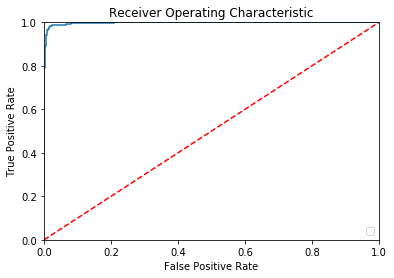

In [69]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
model_best = get_model_cnn()
model_best.load_weights('saved_models/weights.best.from_scratch.hdf5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, 178, 1)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 64)          250416    
_________________________________________________________________
conv1d_31 (Conv1D)           (None, None, 128)         24704     
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, None, 128)         0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, None, 128)         49280     
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, None, 2)           770       
Total para

In [135]:
predicted_best = [np.argmax(i) for i in model_best.predict(test_tensors)]
predicted_best_train = [np.argmax(i) for i in model_best.predict(train_tensors)]

In [72]:
accuracy_score(test_targets.flatten(),predicted_best)

0.9878787878787879

In [137]:
accuracy_score(train_targets.flatten(),predicted_best_train)

0.9947694691979853

In [109]:
fpr_best, tpr_best, threshold_best=roc_curve(test_targets.flatten(), model_best.predict(test_tensors)[:,:,1])

mt.auc(fpr_best,tpr_best)

0.9983771600300526

W0929 15:30:48.523338 4474901952 legend.py:1384] No handles with labels found to put in legend.


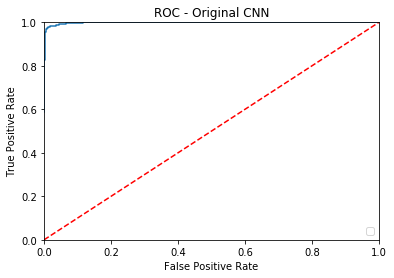

In [148]:
plt.figure()
plt.title('ROC - Original CNN')
plt.plot(fpr_best, tpr_best)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Test model1 with Fourier transform of Inputs

In [75]:
model1.fit(fourier_train_tensors, train_targets, 
          validation_data=(fourier_valid_tensors, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer1], verbose=1)

Train on 5162 samples, validate on 2543 samples
Epoch 1/20


/Users/jessexing/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


5162/5162 [==============================] - 9s 2ms/step - loss: 0.3247 - accuracy_mod_func: 0.8690 - val_loss: 0.0973 - val_accuracy_mod_func: 0.9599

Epoch 00001: val_loss improved from inf to 0.09728, saving model to saved_models/weights.best.from_scratch_2.hdf5
Epoch 2/20
5162/5162 [==============================] - 7s 1ms/step - loss: 0.1159 - accuracy_mod_func: 0.9547 - val_loss: 0.1055 - val_accuracy_mod_func: 0.9607

Epoch 00002: val_loss did not improve from 0.09728
Epoch 3/20
5162/5162 [==============================] - 7s 1ms/step - loss: 0.1007 - accuracy_mod_func: 0.9626 - val_loss: 0.0864 - val_accuracy_mod_func: 0.9689

Epoch 00003: val_loss improved from 0.09728 to 0.08641, saving model to saved_models/weights.best.from_scratch_2.hdf5
Epoch 4/20
5162/5162 [==============================] - 7s 1ms/step - loss: 0.1029 - accuracy_mod_func: 0.9638 - val_loss: 0.1066 - val_accuracy_mod_func: 0.9540

Epoch 00004: val_loss did not improve from 0.08641
Epoch 5/20
5162/5162 [===

In [111]:
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, threshold1=roc_curve(valid_targets.flatten(), model1.predict(fourier_valid_tensors)[:,:,1])

mt.auc(fpr1,tpr1)

/Users/jessexing/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.9919348996573665

In [110]:
fpr1_test, tpr1_test, threshold2=roc_curve(test_targets.flatten(), model1.predict(fourier_test_tensors)[:,:,1])

mt.auc(fpr1_test,tpr1_test)

/Users/jessexing/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.9936112482558764

In [130]:
predicted = [np.argmax(i) for i in model1.predict(fourier_test_tensors)]

predicted_train = [np.argmax(i) for i in model1.predict(fourier_train_tensors)]


/Users/jessexing/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(test_targets.flatten(),predicted)

0.9696969696969697

In [131]:
accuracy_score(train_targets.flatten(),predicted_train)

0.9887640449438202

In [80]:
model3 = get_model_cnn()
model3.load_weights('saved_models/weights.best.from_scratch_2.hdf5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, None, 178, 1)      0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 64)          250416    
_________________________________________________________________
conv1d_42 (Conv1D)           (None, None, 128)         24704     
_________________________________________________________________
spatial_dropout1d_16 (Spatia (None, None, 128)         0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, None, 128)         49280     
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, None, 2)           770       
Total para

In [132]:
predicted3 = [np.argmax(i) for i in model3.predict(fourier_test_tensors)]
predicted_train3 = [np.argmax(i) for i in model3.predict(fourier_train_tensors)]


/Users/jessexing/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [82]:
accuracy_score(test_targets.flatten(),predicted3)

0.9718050065876153

In [133]:
accuracy_score(train_targets.flatten(),predicted_train3)

0.9810151104223169

In [146]:
fpr1_best, tpr1_best, threshold1_best=roc_curve(test_targets.flatten(), model3.predict(fourier_test_tensors)[:,:,1])

mt.auc(fpr1_best,tpr1_best)

/Users/jessexing/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.9936477406890629

W0929 15:29:31.091457 4474901952 legend.py:1384] No handles with labels found to put in legend.


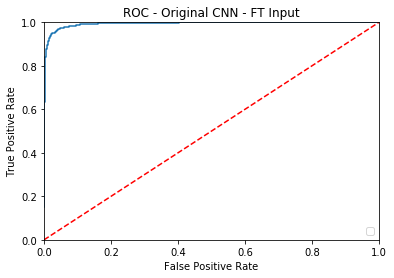

In [147]:
plt.figure()
plt.title('ROC - Original CNN - FT Input')
plt.plot(fpr1_best, tpr1_best)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
threshold2

array([1.00000000e+00, 9.99999881e-01, 9.99999762e-01, 9.99999642e-01,
       9.99999523e-01, 9.99999404e-01, 9.99999285e-01, 9.99999046e-01,
       9.99998331e-01, 9.99996781e-01, 9.99996424e-01, 9.99995470e-01,
       9.99995351e-01, 9.99884367e-01, 9.99884248e-01, 9.99800622e-01,
       9.99791682e-01, 9.99768794e-01, 9.99763787e-01, 9.98779953e-01,
       9.98767853e-01, 9.98601258e-01, 9.98521507e-01, 9.98426437e-01,
       9.98421550e-01, 9.98252094e-01, 9.98238564e-01, 9.96058583e-01,
       9.95752215e-01, 9.92176235e-01, 9.91871357e-01, 9.90552664e-01,
       9.90383744e-01, 9.89229083e-01, 9.89172459e-01, 9.84464824e-01,
       9.84116733e-01, 9.81342733e-01, 9.80965614e-01, 9.70874488e-01,
       9.69134271e-01, 9.62967813e-01, 9.61483598e-01, 9.59709108e-01,
       9.59557712e-01, 9.38777089e-01, 9.38643932e-01, 9.32985902e-01,
       9.32874918e-01, 9.32604611e-01, 9.25826073e-01, 9.19516444e-01,
       9.07861948e-01, 8.91700685e-01, 8.73935342e-01, 8.72704387e-01,
      

In [85]:
np.argmax(tpr1-fpr1)

64

In [86]:
tpr1[105]

0.996

In [87]:
fpr1[105]

0.44248653940283894

In [88]:
threshold2[105]

0.38342214

W0928 11:56:21.584903 4474901952 legend.py:1384] No handles with labels found to put in legend.


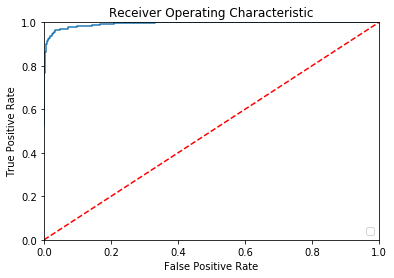

In [89]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1_test, tpr1_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Simpler model to Run on Fourier Transform data - (test)

In [90]:
seq_input = Input(shape=(None, WINDOW_SIZE, 1))
model2 = Sequential()#(seq_input)
model2.add(Dense(32, input_dim=178, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(2, activation='sigmoid'))
model2.compile(optimizers.Adam(), losses.sparse_categorical_crossentropy, metrics=['acc'])
#model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model2.compile(optimizers.Adam(0.001), losses.sparse_categorical_crossentropy, metrics=['acc'])


model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                5728      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 65,762
Trainable params: 65,762
Non-trainable params: 0
_________________________________________________________________


Normalize Fourier Transform Data

In [91]:
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
fourier_X_train_norm = scaler.fit_transform(np.array(fourier_X_train).transpose()).transpose()

fourier_X_valid_norm = scaler.fit_transform(np.array(fourier_X_valid).transpose()).transpose()

/Users/jessexing/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/Users/jessexing/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype complex128 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [92]:
fourier_X_train[0]

array([-1.50800000e+03+0.00000000e+00j,  2.56073261e+02+1.14401665e+03j,
       -1.02731690e+03-2.66856194e+02j, -7.33564580e+02+8.78544462e+02j,
        4.98209288e+02+1.26669285e+02j, -7.31997778e+02-3.28220486e+02j,
        9.97034370e+02-9.81335294e+00j,  1.75815809e+02-2.29227580e+02j,
        9.13023322e+02+3.20985936e+02j, -7.55393168e+02+9.33624540e+02j,
       -5.87621777e+02+5.22405422e+02j, -1.90141704e+02+1.04323565e+02j,
       -1.00051684e+03-1.27099430e+03j,  1.16988346e+03-3.02936392e+02j,
       -1.26453430e+03+1.48226853e+03j, -8.85480464e-01+1.20626774e+03j,
       -8.46935392e+01-5.92091797e+02j, -1.48556094e+03-2.02526153e+03j,
        1.01390229e+03-3.34112307e+02j, -9.84329983e+01-9.95501314e+02j,
        6.68758571e+02+9.48972258e+02j,  2.42740564e+02+1.15255685e+02j,
       -2.08794725e+02+4.11030108e+02j,  2.81438897e+02+1.18565510e+02j,
       -1.86105228e+02-2.13812996e+02j,  8.64052950e+01+2.47559017e+02j,
        5.82620965e+02-3.69550551e+02j,  1.05198503

In [93]:
fourier_X_train_norm[0]

array([0.        , 0.65875655, 0.17950113, 0.28919683, 0.74917722,
       0.28978192, 0.93545309, 0.62878607, 0.90408091, 0.2810454 ,
       0.34369615, 0.49212683, 0.18950905, 1.        , 0.09091721,
       0.56280064, 0.53150426, 0.0083794 , 0.94175207, 0.52637354,
       0.81286531, 0.65377773, 0.48516125, 0.66822882, 0.49363417,
       0.59539757, 0.78069901, 0.6024155 , 0.5981264 , 0.63534893,
       0.52188937, 0.6131271 , 0.56104069, 0.66575022, 0.63017507,
       0.46039385, 0.53287066, 0.57103471, 0.56850967, 0.5844272 ,
       0.57045372, 0.55108725, 0.58767416, 0.5289869 , 0.54554742,
       0.57263606, 0.58109057, 0.57506068, 0.61960561, 0.5771738 ,
       0.5550245 , 0.43309724, 0.62045598, 0.59771227, 0.57775906,
       0.56642706, 0.57751006, 0.58948973, 0.58851549, 0.56008594,
       0.56538889, 0.58264049, 0.5554594 , 0.5713749 , 0.56490197,
       0.55226669, 0.58544722, 0.5884264 , 0.57605243, 0.57285221,
       0.56905438, 0.59223458, 0.56629701, 0.57968199, 0.56762

In [94]:
model2.fit(np.array(fourier_X_train), train_targets.reshape(len(train_targets),1), 
          validation_data=(np.array(fourier_X_valid), valid_targets.reshape(len(valid_targets),1)),
          epochs=20, batch_size=5, callbacks=[checkpointer2], verbose=1)

Train on 5162 samples, validate on 2543 samples
Epoch 1/20


/Users/jessexing/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


5162/5162 [==============================] - 5s 1ms/step - loss: 3.2168 - acc: 0.8005 - val_loss: 3.1691 - val_acc: 0.8034

Epoch 00001: val_loss improved from inf to 3.16911, saving model to saved_models/weights.best.from_scratch_3.hdf5
Epoch 2/20
5162/5162 [==============================] - 3s 511us/step - loss: 3.2161 - acc: 0.8005 - val_loss: 3.1691 - val_acc: 0.8034

Epoch 00002: val_loss did not improve from 3.16911
Epoch 3/20
5162/5162 [==============================] - 3s 667us/step - loss: 3.2161 - acc: 0.8005 - val_loss: 3.1691 - val_acc: 0.8034

Epoch 00003: val_loss did not improve from 3.16911
Epoch 4/20
5162/5162 [==============================] - 3s 487us/step - loss: 3.2161 - acc: 0.8005 - val_loss: 3.1691 - val_acc: 0.8034

Epoch 00004: val_loss did not improve from 3.16911
Epoch 5/20
5162/5162 [==============================] - 3s 490us/step - loss: 3.2161 - acc: 0.8005 - val_loss: 3.1691 - val_acc: 0.8034

Epoch 00005: val_loss did not improve from 3.16911
Epoch 6/20

In [95]:
model2.fit(fourier_X_train_norm, train_targets.reshape(len(train_targets),1), 
          validation_data=(fourier_X_valid_norm, valid_targets.reshape(len(valid_targets),1)),
          epochs=20, batch_size=5, callbacks=[checkpointer3], verbose=1)

Train on 5162 samples, validate on 2543 samples
Epoch 1/20
5162/5162 [==============================] - 2s 431us/step - loss: 0.5093 - acc: 0.8005 - val_loss: 0.4922 - val_acc: 0.8034

Epoch 00001: val_loss improved from inf to 0.49218, saving model to saved_models/weights.best.from_scratch_4.hdf5
Epoch 2/20
5162/5162 [==============================] - 2s 443us/step - loss: 0.4824 - acc: 0.8005 - val_loss: 0.4741 - val_acc: 0.8034

Epoch 00002: val_loss improved from 0.49218 to 0.47414, saving model to saved_models/weights.best.from_scratch_4.hdf5
Epoch 3/20
5162/5162 [==============================] - 2s 447us/step - loss: 0.4721 - acc: 0.8005 - val_loss: 0.4510 - val_acc: 0.8034

Epoch 00003: val_loss improved from 0.47414 to 0.45098, saving model to saved_models/weights.best.from_scratch_4.hdf5
Epoch 4/20
5162/5162 [==============================] - 2s 454us/step - loss: 0.4555 - acc: 0.8005 - val_loss: 0.4782 - val_acc: 0.8034

Epoch 00004: val_loss did not improve from 0.45098
Epo

In [96]:
a = [i for i in model2.predict(fourier_X_valid_norm)]

In [97]:
a

[array([0.9908357 , 0.13405228], dtype=float32),
 array([0.99258125, 0.10413197], dtype=float32),
 array([0.7940873, 0.3601856], dtype=float32),
 array([0.95344007, 0.20798084], dtype=float32),
 array([0.9499433 , 0.23375747], dtype=float32),
 array([0.9545448, 0.2061866], dtype=float32),
 array([0.61817896, 0.43488875], dtype=float32),
 array([0.83618927, 0.32418087], dtype=float32),
 array([0.9935305 , 0.09867671], dtype=float32),
 array([0.69849426, 0.40656623], dtype=float32),
 array([0.59378755, 0.44414064], dtype=float32),
 array([0.7898934, 0.353887 ], dtype=float32),
 array([0.9999989 , 0.00412309], dtype=float32),
 array([0.99896437, 0.04696885], dtype=float32),
 array([0.99850214, 0.05469769], dtype=float32),
 array([0.9996836, 0.0285953], dtype=float32),
 array([0.6075915, 0.4390734], dtype=float32),
 array([0.99679935, 0.07452878], dtype=float32),
 array([0.9645278 , 0.18843079], dtype=float32),
 array([0.6005957 , 0.44213498], dtype=float32),
 array([0.593828  , 0.44412094

In [98]:
type(valid_targets)

numpy.ndarray

In [99]:
type(fourier_X_valid_norm)

numpy.ndarray

In [100]:
model2.predict(fourier_X_valid_norm)[:,1]

array([0.13405228, 0.10413197, 0.3601856 , ..., 0.13405226, 0.08829234,
       0.01565431], dtype=float32)

In [101]:
valid_targets.flatten()

array([0, 0, 0, ..., 0, 1, 0])

In [102]:
from sklearn.metrics import roc_curve, auc
#fpr2, tpr2, threshold = 
fpr2, tpr2, threshold=roc_curve(valid_targets.flatten(), model2.predict(fourier_X_valid_norm)[:,1])

W0928 11:58:08.541244 4474901952 legend.py:1384] No handles with labels found to put in legend.


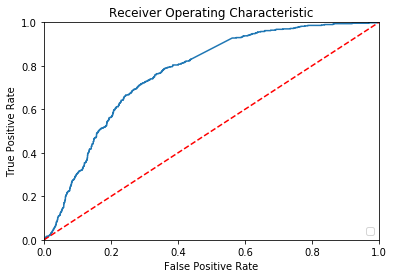

In [103]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
mt.auc(fpr2, tpr2)

0.7683886441507586

# Refined Model (doubling neural net)

In [120]:

def get_base_model_refined():
    inp = Input(shape=(WINDOW_SIZE, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = SpatialDropout1D(rate=0.01)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = SpatialDropout1D(rate=0.01)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = SpatialDropout1D(rate=0.01)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.01)(img_1)

    dense_1 = Dropout(0.01)(Dense(128, activation=activations.relu, name="dense_1")(img_1))

    base_model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    base_model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    #model.summary()
    return base_model

In [121]:
def get_model_cnn_refined():
    nclass = 2

    seq_input = Input(shape=(None, WINDOW_SIZE,1))#Input(shape=(None, WINDOW_SIZE, 1))
    base_model = get_base_model_refined()
    # for layer in base_model.layers:
    #     layer.trainable = False
    encoded_sequence = TimeDistributed(base_model)(seq_input)
    encoded_sequence = SpatialDropout1D(rate=0.01)(Convolution1D(256,
                                                               kernel_size=3,
                                                               activation="relu",
                                                               padding="same")(encoded_sequence))
    encoded_sequence = Dropout(rate=0.05)(Convolution1D(256,
                                                               kernel_size=3,
                                                               activation="relu",
                                                               padding="same")(encoded_sequence))

    #out = TimeDistributed(Dense(nclass, activation="softmax"))(encoded_sequence)
    out = Convolution1D(nclass, kernel_size=3, activation="softmax", padding="same")(encoded_sequence)

    model = models.Model(seq_input, out)
    
    def custom_loss_function(y_true,y_pred):
        #predicted = np.argmax(y_pred)
        #print(y_true)
        #print(y_pred)
        pred = K.slice(y_pred,[0,0,1],[-1,-1,1])
        return losses.binary_crossentropy(y_true,pred)
    
    def accuracy_mod_func(y_true,y_pred):
        #predicted = np.argmax(y_pred)
        #print(y_true)
        #print(y_pred)
        return K.mean(K.equal(y_true,K.round(K.slice(y_pred,[0,0,1],[-1,-1,1])))) #K.mean(K.equal(K.cast(y_true,"int64"),K.argmax(y_pred)))#K.mean(accuracy_score(y_true,predicted))

    model.compile(optimizers.Adam(0.001), custom_loss_function, metrics=[accuracy_mod_func]) #metrics.categorical_accuracy])  #'acc'])
    #losses.sparse_categorical_crossentropy
    model.summary()
    return model



In [122]:
model_refined = get_model_cnn_refined()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, None, 178, 1)      0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 128)         266864    
_________________________________________________________________
conv1d_75 (Conv1D)           (None, None, 256)         98560     
_________________________________________________________________
spatial_dropout1d_28 (Spatia (None, None, 256)         0         
_________________________________________________________________
conv1d_76 (Conv1D)           (None, None, 256)         196864    
_________________________________________________________________
dropout_21 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
conv1d_77 (Conv1D)           (None, None, 2)           1538      
Total para

In [123]:
model_refined.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer_refined], verbose=1)

Train on 5162 samples, validate on 2543 samples
Epoch 1/20
5162/5162 [==============================] - 11s 2ms/step - loss: 0.2270 - accuracy_mod_func: 0.9194 - val_loss: 0.0864 - val_accuracy_mod_func: 0.9685

Epoch 00001: val_loss did not improve from 0.05500
Epoch 2/20
5162/5162 [==============================] - 8s 2ms/step - loss: 0.0856 - accuracy_mod_func: 0.9704 - val_loss: 0.0831 - val_accuracy_mod_func: 0.9709

Epoch 00002: val_loss did not improve from 0.05500
Epoch 3/20
5162/5162 [==============================] - 8s 2ms/step - loss: 0.0674 - accuracy_mod_func: 0.9764 - val_loss: 0.2703 - val_accuracy_mod_func: 0.8801

Epoch 00003: val_loss did not improve from 0.05500
Epoch 4/20
5162/5162 [==============================] - 8s 2ms/step - loss: 0.0721 - accuracy_mod_func: 0.9766 - val_loss: 0.0529 - val_accuracy_mod_func: 0.9847

Epoch 00004: val_loss improved from 0.05500 to 0.05291, saving model to saved_models/weights.best.from_scratch_refined.hdf5
Epoch 5/20
5162/5162 [

In [124]:
model_best_refined = get_model_cnn_refined()
model_best_refined.load_weights('saved_models/weights.best.from_scratch_refined.hdf5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, None, 178, 1)      0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 128)         266864    
_________________________________________________________________
conv1d_86 (Conv1D)           (None, None, 256)         98560     
_________________________________________________________________
spatial_dropout1d_32 (Spatia (None, None, 256)         0         
_________________________________________________________________
conv1d_87 (Conv1D)           (None, None, 256)         196864    
_________________________________________________________________
dropout_24 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
conv1d_88 (Conv1D)           (None, None, 2)           1538      
Total para

In [139]:
predicted_best_refined = [np.argmax(i) for i in model_best_refined.predict(test_tensors)]
predicted_best_train_refined = [np.argmax(i) for i in model_best_refined.predict(train_tensors)]

In [126]:
accuracy_score(test_targets.flatten(),predicted_best_refined)

0.9884057971014493

In [140]:
accuracy_score(train_targets.flatten(),predicted_best_train_refined)

0.9947694691979853

In [149]:
fpr_best_refined, tpr_best_refined, threshold_best_refined=roc_curve(test_targets.flatten(), model_best_refined.predict(test_tensors)[:,:,1])

mt.auc(fpr_best_refined,tpr_best_refined)

0.9974785875281743

W0929 15:42:21.258749 4474901952 legend.py:1384] No handles with labels found to put in legend.


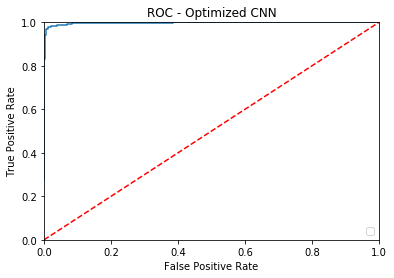

In [150]:
plt.figure()
plt.title('ROC - Optimized CNN')
plt.plot(fpr_best_refined, tpr_best_refined)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Plots of Accuracy and F-score

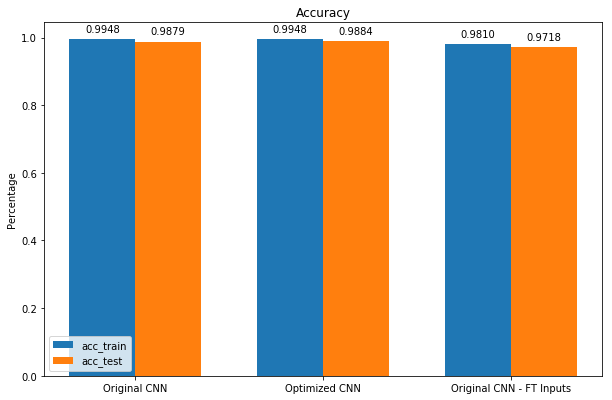

In [141]:
objects = ['Original CNN','Optimized CNN', 'Original CNN - FT Inputs']#results.keys()

xt = np.arange(len(objects))


actr1 = accuracy_score(train_targets.flatten(),predicted_best_train)
actr2 = accuracy_score(train_targets.flatten(),predicted_best_train_refined)
actr3 = accuracy_score(train_targets.flatten(),predicted_train3)

yt = [actr1, actr2, actr3]

act1 = accuracy_score(test_targets.flatten(),predicted_best)
act2 = accuracy_score(test_targets.flatten(),predicted_best_refined)
act3 = accuracy_score(test_targets.flatten(),predicted3)

y1 = [act1, act2, act3]



f,ax = plt.subplots(figsize=(10,6.5))

width = .35
plt.bar(xt,yt,width,label='acc_train')

plt.bar(xt+width, y1,width, label='acc_test')

plt.xticks(xt+width/2,objects)

plt.ylabel('Percentage')

plt.title('Accuracy')

plt.legend(loc='lower left')

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.4f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)



plt.show()

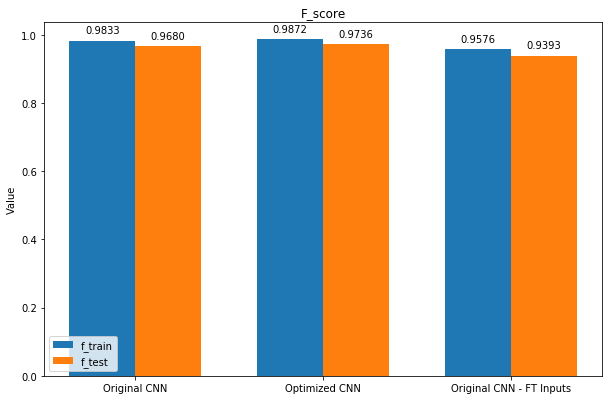

In [144]:
from sklearn.metrics import fbeta_score

objects = ['Original CNN','Optimized CNN', 'Original CNN - FT Inputs']#results.keys()

xt = np.arange(len(objects))


actr1 = fbeta_score(train_targets.flatten(),predicted_best_train,beta=.5)
actr2 = fbeta_score(train_targets.flatten(),predicted_best_train_refined,beta=.5)
actr3 = fbeta_score(train_targets.flatten(),predicted_train3,beta=.5)

yt = [actr1, actr2, actr3]

act1 = fbeta_score(test_targets.flatten(),predicted_best,beta=.5)
act2 = fbeta_score(test_targets.flatten(),predicted_best_refined,beta=.5)
act3 = fbeta_score(test_targets.flatten(),predicted3,beta=.5)

y1 = [act1, act2, act3]




f,ax = plt.subplots(figsize=(10,6.5))

width = .35
plt.bar(xt,yt,width,label='f_train')

plt.bar(xt+width, y1,width, label='f_test')

plt.xticks(xt+width/2,objects)

plt.ylabel('Value')

plt.title('F_score')

plt.legend(loc='lower left')

# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.show()

In [152]:
def fp_fn(predictions,test):
    false_positives = []
    false_negatives = []
    
    for idx in range(len(predictions)):
        if (predictions[idx] and not test[idx]):
            false_positives.append(idx)
        elif (not predictions[idx] and test[idx]):
            false_negatives.append(idx)
    return false_positives, false_negatives

In [156]:
false_positives, false_negatives = fp_fn(test_targets.flatten(),predicted_best_refined)

In [157]:
X_test.iloc[false_positives]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
1408,-31,-38,-52,-64,-69,-76,-77,-79,-80,-85,...,-78,-76,-75,-78,-81,-81,-76,-72,-63,-55
3094,-54,-62,-73,-88,-94,-110,-120,-131,-139,-144,...,80,11,-74,-134,-150,-137,-108,-91,-78,-60
6742,-291,-323,-353,-372,-396,-406,-432,-437,-434,-377,...,161,173,85,-71,-108,-1,65,57,-46,-139
5062,344,310,310,326,371,405,429,442,461,500,...,248,290,279,230,189,193,226,275,321,343
7386,202,193,167,140,111,88,67,56,58,69,...,-52,-3,13,-69,-141,-182,-158,-124,-93,-74
3265,-87,-91,-91,-97,-97,-102,-103,-107,-110,-108,...,5,2,3,-7,-9,-12,-7,-13,-16,-21
1634,79,49,26,-12,-45,-85,-87,-47,-23,-49,...,-64,-49,-27,48,89,102,51,-34,-94,-151
3369,100,82,56,45,41,41,45,54,67,81,...,-16,5,35,65,71,36,-10,-44,-53,-36
11351,-66,-75,-95,-120,-141,-164,-172,-176,-192,-244,...,6,26,50,82,107,135,144,81,-30,-117
5848,-430,-362,-284,-219,-156,-106,-57,-20,4,14,...,-11,22,39,29,14,20,34,14,-72,-168


In [158]:
X_test.iloc[false_negatives]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
624,-97,-96,-92,-60,-42,-33,-60,-72,-80,-78,...,-217,-236,-252,-252,-258,-256,-259,-272,-297,-315
7876,162,164,164,154,139,99,106,77,88,93,...,-39,-103,-147,-173,-169,-150,-128,-102,-89,-95
251,-566,-609,-594,-549,-481,-427,-385,-358,-336,-309,...,261,262,243,219,193,145,79,9,-26,-34
6899,-2,-4,-6,-8,-5,-4,-6,-12,-22,-26,...,-74,-72,-73,-80,-92,-105,-110,-109,-103,-91
3919,-161,-160,-156,-143,-131,-113,-102,-94,-95,-91,...,-140,-143,-148,-152,-160,-157,-160,-152,-145,-142
1904,-22,-4,15,23,29,30,35,6,-11,-26,...,-1,-54,-100,-135,-154,-183,-204,-230,-262,-305
7113,-114,-116,-88,-44,18,46,56,45,19,-32,...,2,-1,56,157,181,137,98,73,30,4
7288,88,54,55,56,73,81,81,83,78,62,...,12,3,-3,-27,-18,-6,15,33,51,58
5792,-53,-40,-27,-7,1,0,-9,-25,-35,-34,...,-29,-43,-53,-66,-62,-58,-43,-24,-17,7
2495,-161,-185,-217,-219,-214,-176,-148,-126,-94,-71,...,89,72,54,31,6,-16,-35,-58,-79,-95


In [159]:
def plotsub(data,label):
    x = range(len(data))
    plt.figure()
    plt.plot(x,data)
    plt.title(label)
    plt.xlabel('Sample #')
    plt.ylabel('EEG Reading')

/Users/jessexing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


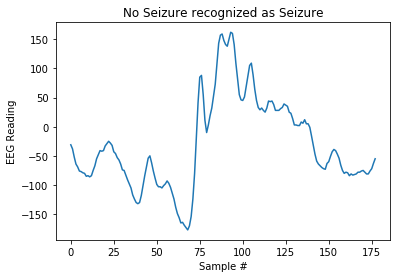

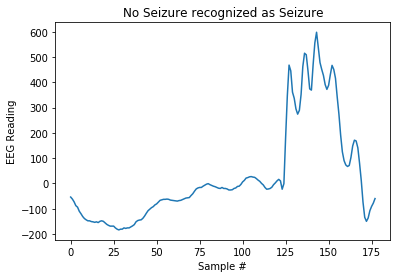

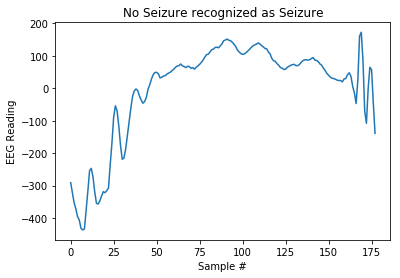

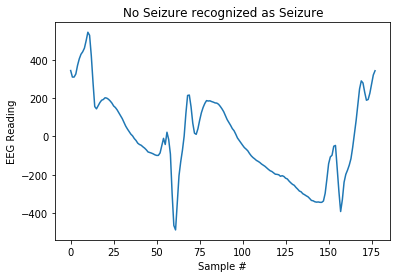

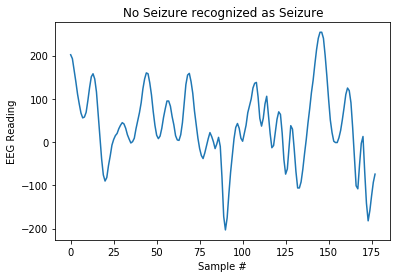

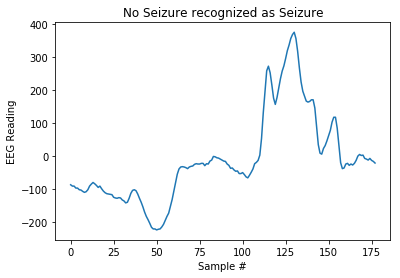

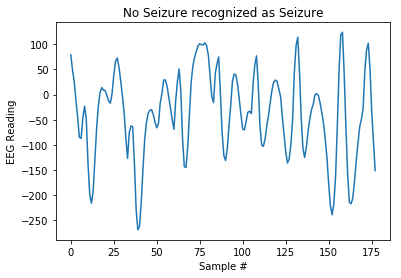

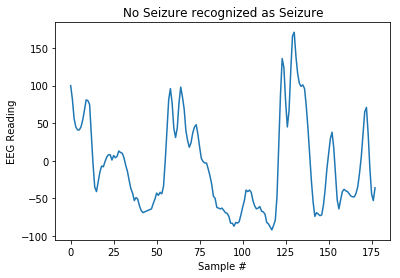

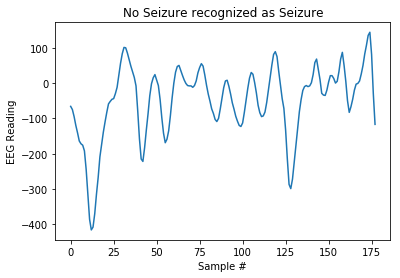

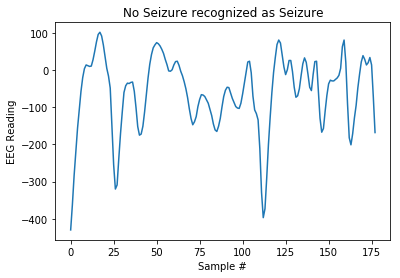

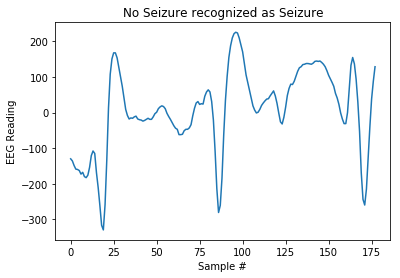

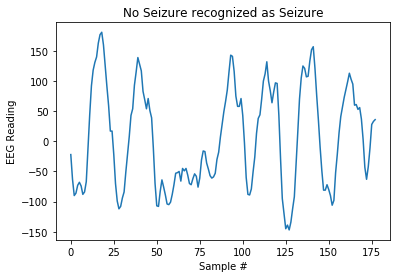

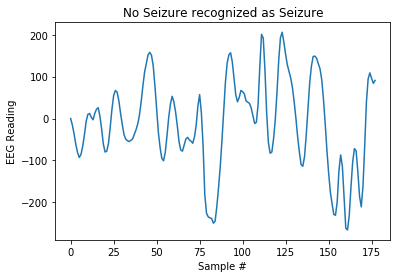

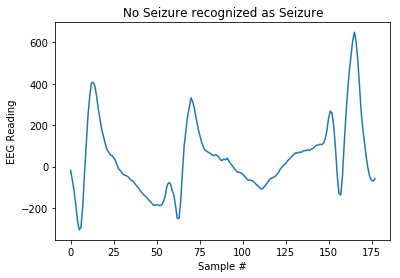

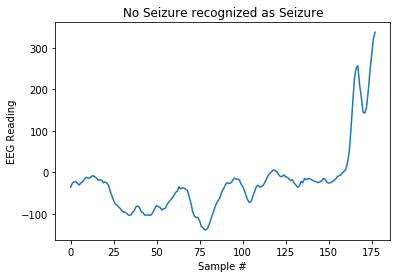

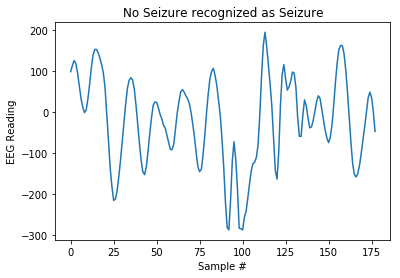

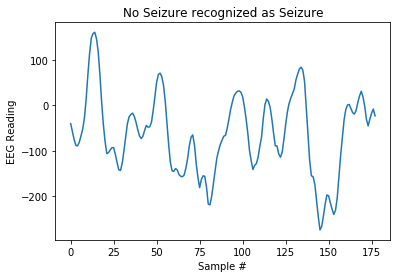

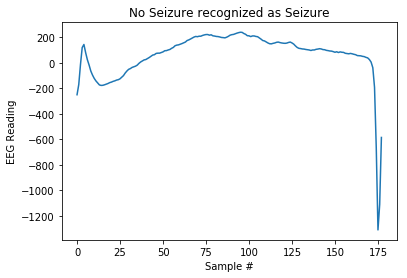

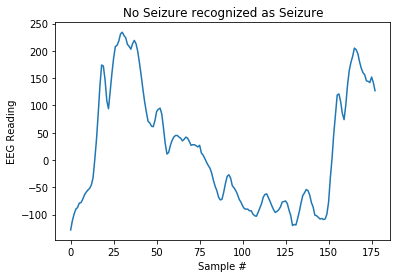

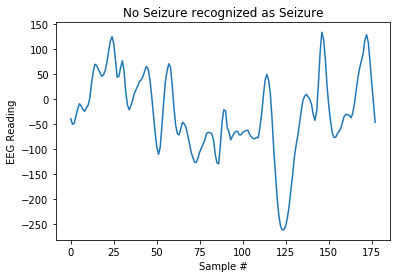

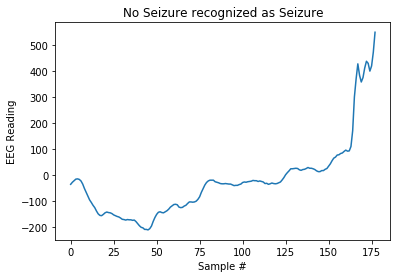

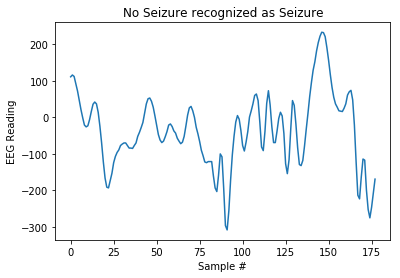

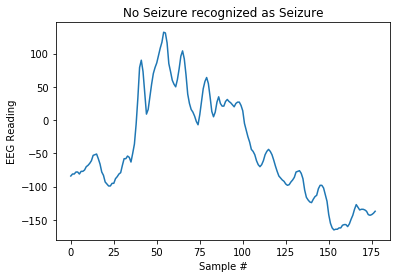

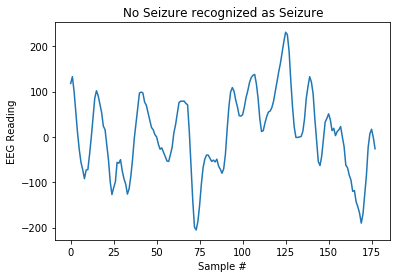

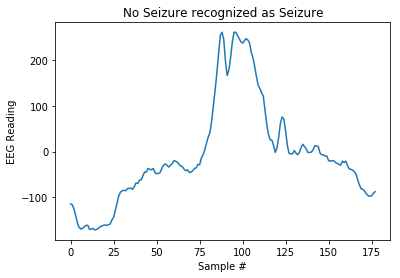

In [160]:
fp_test = X_test.iloc[false_positives]
for row in fp_test.iterrows():
    #print(row)  
    #print(row[1])
    plotsub(row[1],'No Seizure recognized as Seizure')

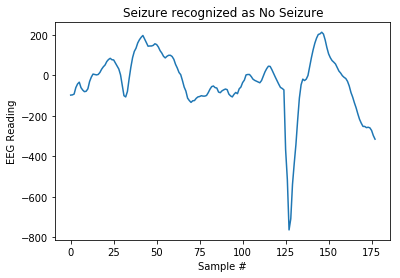

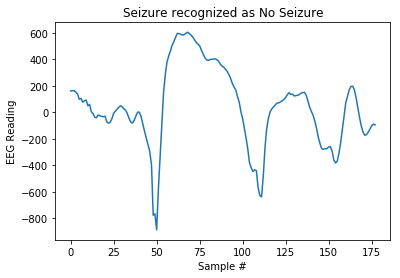

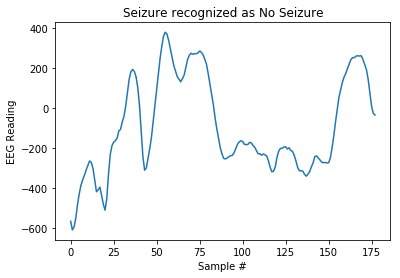

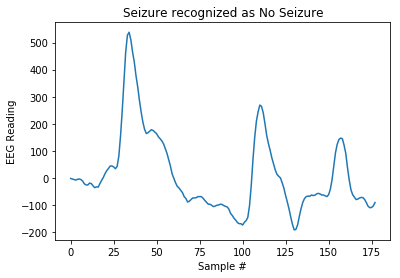

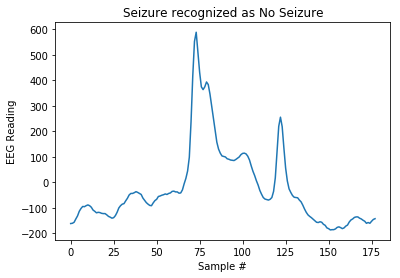

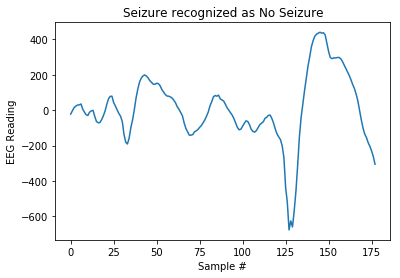

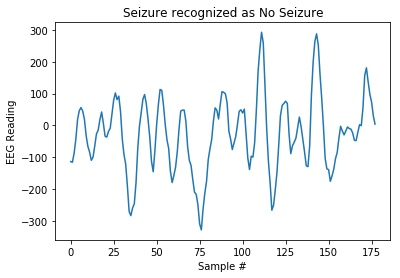

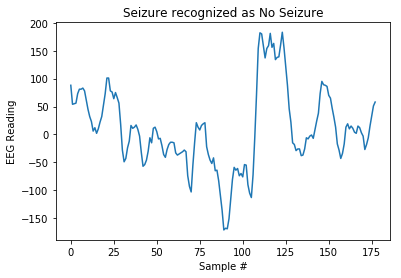

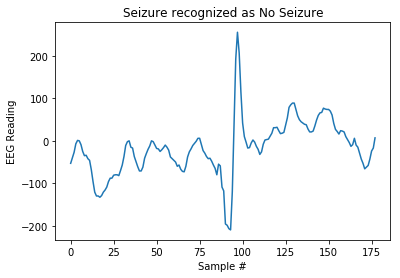

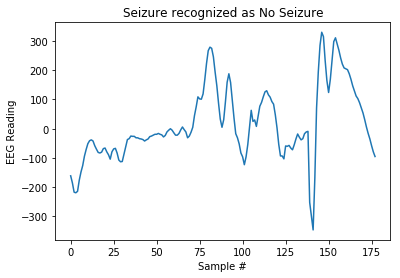

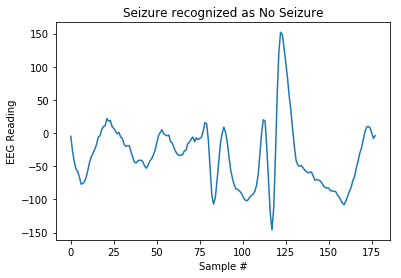

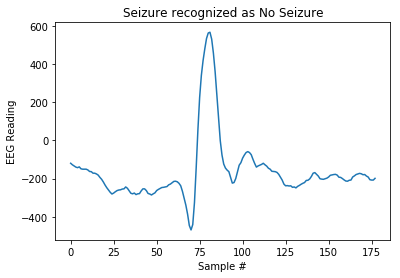

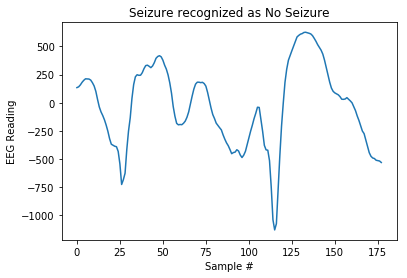

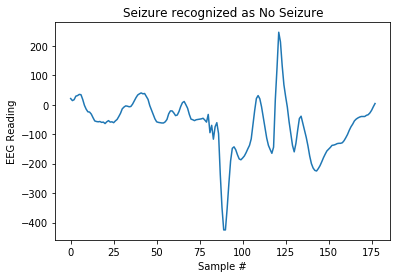

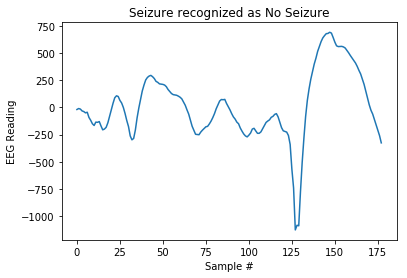

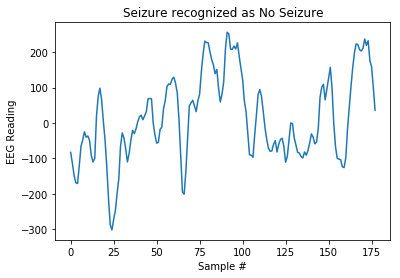

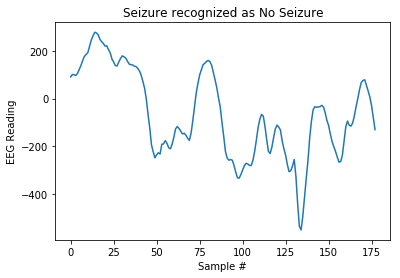

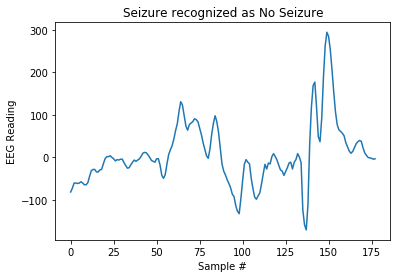

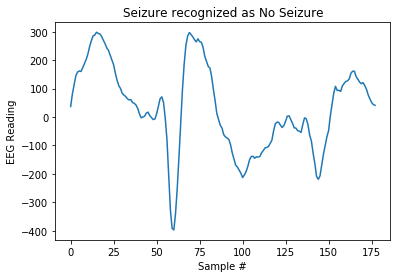

In [162]:
fn_test = X_test.iloc[false_negatives]
for row in fn_test.iterrows():
    #print(row)  
    #print(row[1])
    plotsub(row[1],'Seizure recognized as No Seizure')